<a href="https://colab.research.google.com/github/Ammaratahir252/Syntecxhub_Maze_Solver/blob/main/Week%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

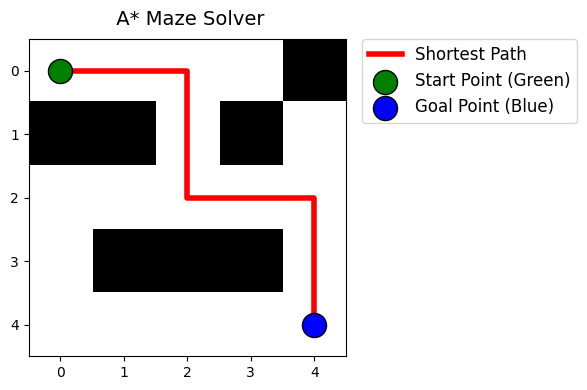

In [15]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# 1. Heuristic function (Manhattan Distance)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# 2. Implement A* search
def a_star(maze, start, goal):
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic(start, goal)}
    oheap = []

    heapq.heappush(oheap, (fscore[start], start))

    while oheap:
        current = heapq.heappop(oheap)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        close_set.add(current)
        for i, j in neighbors:
            neighbor = (current[0] + i, current[1] + j)

            if 0 <= neighbor[0] < maze.shape[0] and 0 <= neighbor[1] < maze.shape[1]:
                if maze[neighbor[0]][neighbor[1]] == 1:
                    continue
            else:
                continue

            tentative_g_score = gscore[current] + 1

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))

    return None

# 3. Enhanced Visualization
def visualize_maze_wide(maze, path, start, goal):
    # Width is increased to 12, height remains 6
    fig, ax = plt.subplots(figsize=(100, 4))

    # cmap='binary' makes walls (1) black and paths (0) white
    ax.imshow(maze, cmap='binary')

    if path:
        y_coords, x_coords = zip(*path)
        ax.plot(x_coords, y_coords, color='red', linewidth=4, label='Shortest Path', zorder=2)

    # Plotting Start and Goal points on the grid
    ax.scatter(start[1], start[0], color='green', s=300, label='Start Point (Green)', zorder=5, edgecolors='black')
    ax.scatter(goal[1], goal[0], color='blue', s=300, label='Goal Point (Blue)', zorder=5, edgecolors='black')

    plt.title(" A* Maze Solver", fontsize=14, pad=10)

    # MOVING THE LEGEND: 'bbox_to_anchor' moves it outside the plot box to the right
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, borderaxespad=0.)

    plt.tight_layout()
    plt.show()

# --- Execution ---
# 0 = Path, 1 = Wall (Black Box)
maze_grid = np.array([
    [0, 0, 0, 0, 1],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])

start_pos = (0, 0)
goal_pos = (4, 4)

result_path = a_star(maze_grid, start_pos, goal_pos)

if result_path:
    visualize_maze_wide(maze_grid, result_path, start_pos, goal_pos)
else:
    print("No path found.")